                                                                                                    Thuyvi Nguyen
                                                                                                    SID: 25584534

# Assignment 2

In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Question 1a

1a. [5pts] Suppose that an ant wandered randomly by taking steps (x,y), one per second, where at each
ant step, x and y come from a normal distribution with a mean of 0 and a standard deviation of 1.0mm
(assume this for all questions below). Plot a trace of the ant’s path over the course of an hour.

In [20]:
mu = 0
sigma = 1

x_steps = []
y_steps = []
xPos = 0
yPos = 0

for step in range(3600):
  xPos = xPos + np.random.normal(mu, sigma)
  yPos = yPos + np.random.normal(mu, sigma)
  x_steps.append(xPos)
  y_steps.append(yPos)

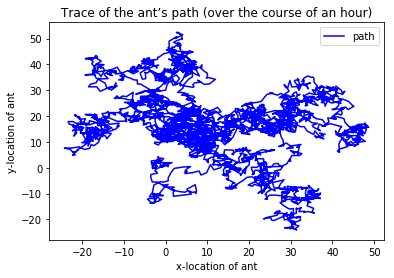

In [21]:
plt.title('Trace of the ant’s path (over the course of an hour)')
plt.xlabel('x-location of ant')
plt.ylabel('y-location of ant')
plt.axis()

plt.plot(x_steps, y_steps,'-b', label='path')
plt.legend()
plt.show()

## Question 1b

1b. [10pts] Let’s think about why ants need to perform path integration. Suppose that instead of path
integration, when an ant found food, it just continued to wander with random steps until it got back to
the nest. Using a simulation, find the probability that an ant who finds food after 1 hour will make its
way back to within 10mm of the nest over the course of the next hour (note that if it comes within
10mm of a nest, it stops). Is this a good strategy? Why or why not?

In [22]:
def distance(x1,x2,y1,y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))

In [23]:
nest = [0, 0]
count = 0
for i in range(1000):
    random_path_X = np.cumsum(np.random.normal(mu, sigma, 3600))
    random_path_Y = np.cumsum(np.random.normal(mu, sigma, 3600))
    
    for j in range(3600):
        if distance(nest[0],random_path_X[i],nest[1],random_path_Y[i]) <= 10:
            count += 1
            break
probability = count/1000
print(probability)

0.163


The probability that an ant who finds food after 1 hour and continued to wander with random steps until it got back to
the nest will make its way back to within 10mm of the nest over the course of the next hour is ~.17, or 17% in this simulation. This is not a good strategy because it's a low probability that the ant will just randomly find its way back, and even if it does it's not efficient.

## Question 1c

1c. [10pts] If the ant searches for an hour, finds food, and then searches for the nest by continuing to
walk at random, what is the average closest distance it will come to the nest over the course of the next
hour? (Do not assume it stops if it comes within 10mm) Find this with a simulation.

In [42]:
nest = [0, 0]

x_steps = []
y_steps = []
xPos = 0
yPos = 0

for step in range(3600):
  x_steps.append(xPos)
  y_steps.append(yPos)
  xPos = xPos + np.random.normal(mu, sigma)
  yPos = yPos + np.random.normal(mu, sigma)

for i in range(1000):
    distances = []
    for j in range(3600):
        x_steps.append(xPos)
        y_steps.append(yPos)
        xPos = xPos + np.random.normal(mu, sigma)
        yPos = yPos + np.random.normal(mu, sigma)
        
        distances.append(distance(nest[0],random_path_X[i],nest[1],random_path_Y[i]))       

In [41]:
np.mean(distances)

41.49117039061697

The average closest distance the ant will come to the nest over the course of the next hour if it continues to walk at random is 41.49117039061697 in this simulation.

## Question 2

[25pts] Now let’s think about path integration. Assume that each step (x,y) is “remembered”
(integrated) internally in the ant’s brain with a standard deviation on each component of S. Thus, if we
store the total X component, it gets updated with a new x step via X ← X+x+ex where ex ~
Gaussian(0,S) and similarly for Y (Y ← Y+y+ ey with ey ~ Gaussian(0,S)). Suppose that, upon finding
food after an hour (as above, one step per second), the ant then heads straight back to where it thinks
the nest is (e.g. it travels back via the vector (-X,-Y)). Thus, the outbound trip is noisy, but the return
trip is noiseless. Run a simulation to see how far the ant will end from the nest for various S from
1.0mm down to 0.0001mm. Plot the mean distance the ant ends from the nest as a function of S. Be
sure to show a range of S values that make it clear what’s going on. 

In [85]:
def steps(noise = 0):
  xPos = 0
  yPos = 0
  
  for i in range(3600):
    xPos = xPos + np.random.normal(mu, sigma) + noise
    yPos = yPos + np.random.normal(mu, sigma) + noise
  return xPos, yPos

In [109]:
S = [.0001,.001, .01, .1, 1.0]
mean_Distance = []
distances = []

antStepX = 0
antStepY = 0


for i in range(len(S)):
    for j in range(100):        
        antStepX, antStepY = steps()
        antNoisyX, antNoisyY = steps(np.random.normal(mu, S[i]))
        
        noiselessX = antStepX-antNoisyX
        noiselessY = antStepY-antNoisyY
        
        distances.append(distance(noiselessX,nest[0],noiselessY,nest[1]))
        distances.append(distance(antNoisyX, nest[0],antNoisyY, nest[1]))
    mean_Distance.append(np.mean(distances))
        
print(mean_Distance)
    

[98.03989227991642, 98.86548284168607, 99.32866500332561, 180.8681776951501, 1045.3627016169833]


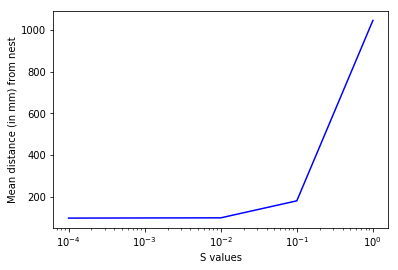

In [110]:
plt.xlabel('S values')
plt.ylabel('Mean distance (in mm) from nest')
plt.axis()
plt.xscale('log')
plt.plot(S, mean_Distance,'-b')
plt.show()

## Question 3a

3a. [20pts] Next, let’s just assume that it requires exp(0.1/S) energy units to run an integrator with a
standard deviation of S for an hour. Suppose further that if you end up at a distance d from the nest
after your return trip, it will take you d^2 energy units to find the nest. By using a simulation, plot the
average energy expended while on a foraging trip (out for an hour and back) as a function of S. Be sure
you have found a range of S to plot that shows the shape of the curve near its minimum.

In [119]:
S = [.001,.01, .02, .1, .2]
energy_units = []

for i in range(len(S)+1):
    energy = np.exp(0.1/S[i]) + np.square(mean_Distance[i])
    energy_units.append(energy)


IndexError: list index out of range

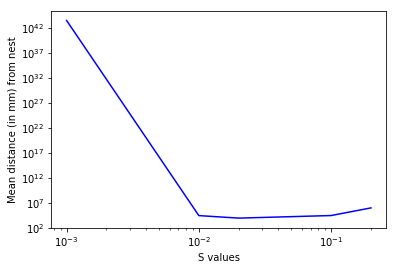

In [120]:
plt.xlabel('S values')
plt.ylabel('Mean distance (in mm) from nest')
plt.axis()

plt.plot(S, energy_units,'-b')
plt.xscale('log')
plt.yscale('log')

## Question 3b

3b. [10pts] What is the evolutionary significance of the minimum of the plot in 3a?

The evolutionary significance of the minimum in plot 3a is that it represents the most efficient use of energy for the ant. The standard deviation values I chose produced the minimum average distances from the nest in problem 2, which means that at the most efficient use of energy there is still some amount of noise which makes sense so that the ant does not expend too much energy remembering its exact location.